# Юнит 2. Итоговое задание

> Все выводы по ходу выполнения будут обозначены такими блоками Blockquotes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

#pd.set_option('display.max_rows', 50) # показывать больше строк
#pd.set_option('display.max_columns', 50) # показывать больше колонок

In [2]:
stud = pd.read_csv('stud_math.csv')
stud.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [3]:
#stud.describe()
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

## Наименование колонок
1. `school` — аббревиатура школы, в которой учится ученик
2. `sex` — пол ученика ('F' - женский, 'M' - мужской)
3. `age` — возраст ученика (от 15 до 22)
4. `address` — тип адреса ученика ('U' - городской, 'R' - за городом)
5. `famsize` — размер семьи('LE3' <= 3, 'GT3' >3)
6. `Pstatus` — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
7. `Medu` — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
8. `Fedu` — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
9. `Mjob` — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
10. `Fjob` — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
11. `reason` — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
12. `guardian` — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
13. `traveltime` — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
14. `studytime` — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
15. `failures` — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
16. `schoolsup` — дополнительная образовательная поддержка (yes или no)
17. `famsup` — семейная образовательная поддержка (yes или no)
18. `paid` — дополнительные платные занятия по математике (yes или no)
19. `activities` — дополнительные внеучебные занятия (yes или no)
20. `nursery` — посещал детский сад (yes или no)
21. `higher` — хочет получить высшее образование (yes или no)
22. `internet` — наличие интернета дома (yes или no)
23. `romantic` — в романтических отношениях (yes или no)
24. `famrel` — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
25. `freetime` — свободное время после школы (от 1 - очень мало до 5 - очень мого)
26. `goout` — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
27. `health` — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
28. `absences` — количество пропущенных занятий
29. `score` — баллы по госэкзамену по математике

## ToDo:

1. Проведите <b>первичную обработку</b> данных. Так как данных много, стоит написать функции, которые можно применять к столбцам определённого типа.
2. Посмотрите на <b>распределение признака</b> для числовых переменных, устраните выбросы.
3. Оцените количество <b>уникальных значений</b> для номинативных переменных.
4. По необходимости <b>преобразуйте</b> данные
5. Проведите <b>корреляционный анализ</b> количественных переменных
6. Отберите <b>не коррелирующие</b> переменные.
7. Проанализируйте номинативные переменные и устраните те, которые <b>не влияют</b> на предсказываемую величину (в нашем случае — на переменную score).
8. Не забудьте сформулировать выводы относительно качества данных и тех переменных, которые вы будете использовать в дальнейшем построении модели.

## Вспомогательные фунции

In [4]:
sns.set() #установим дефолтный темплейт для графиков как в seaborn

# распределение показателей с оценками в баллах будем рисовать не гистограммой
# а обычными барами, для этого соберём вспомогательный marks_df по количеству баллов
marks = ['traveltime','studytime','famrel','freetime','goout','health']
marks_df = pd.DataFrame()
for mark_type in marks:
    marks_df = pd.concat([marks_df,stud[mark_type].value_counts()],axis=1)
#marks_df.index.map(str)

# функция возвращает Series отфильтрованный без выбросов
def filtered(series):
    IQR = series.quantile(0.75) - series.quantile(0.25)
    perc25 = series.quantile(0.25)
    perc75 = series.quantile(0.75)
    return series.loc[series.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

# возвращает маску для фильтрации всего DataFame
def filtered_mask(series):
    IQR = series.quantile(0.75) - series.quantile(0.25)
    perc25 = series.quantile(0.25)
    perc75 = series.quantile(0.75)
    return series.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)

## I Первичная обработка
Фильтрацию показателей и устранение выбросов будем проводить по ходу исследования

## II Распределение признаков для числовых переменных
К числовым переменным отнесём: `age`, `absences`, (_granular_ - пока не ясно что это)

Показатели: `traveltime,studytime,famrel,freetime,gooout,health` - имеют чёткий диапазон значений.

Показатели: `Medu`,`Fedu` - тоже можно считать числовыми как степень образования от 0 до 4.

### Возраст, Прокуски, Granular

In [5]:
stud.age.value_counts()
#sns.countplot(x='age', data=stud)

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x1750c8496a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1750c849d60>,
 'boxes': [<matplotlib.lines.Line2D at 0x1750c849340>],
 'medians': [<matplotlib.lines.Line2D at 0x1750c855460>],
 'fliers': [<matplotlib.lines.Line2D at 0x1750c8557c0>],
 'means': []}

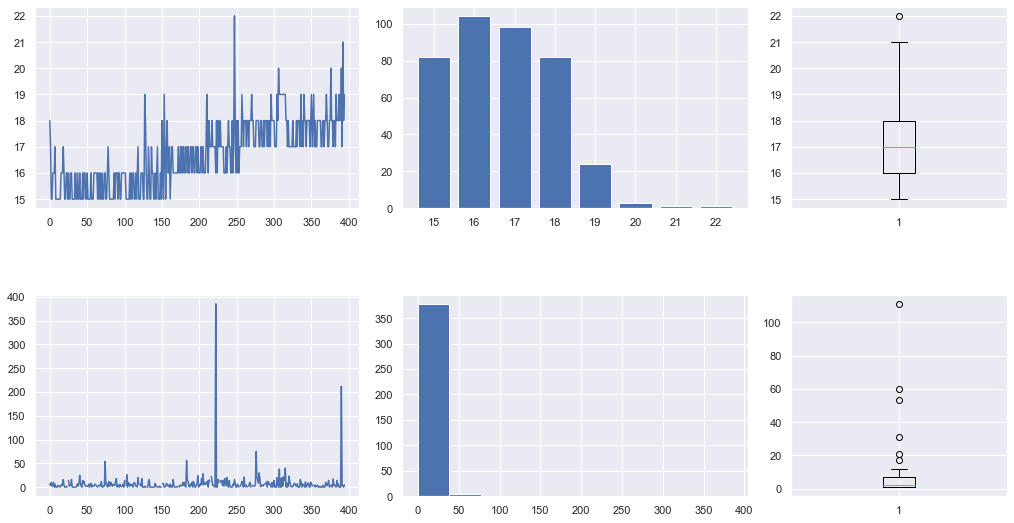

In [6]:
fig = plt.figure()
age = fig.add_axes([0, 0, 0.75, 0.7])
age.plot(stud.age)
age_bar = fig.add_axes([0.85,0,0.8,0.7])
age_bar.bar(x=stud.age.value_counts().index, height=stud.age.value_counts())
age_plot = fig.add_axes([1.75,0,0.5,0.7])
age_plot.boxplot(stud.age)

absences = fig.add_axes([0, -1, 0.75, 0.7])
absences.plot(stud.absences)
absences_hist = fig.add_axes([0.85,-1,0.8,0.7])
absences_hist.hist(stud.absences)
absences_bplot = fig.add_axes([1.75,-1,0.5,0.7])
absences_bplot.boxplot(stud.absences.value_counts())

<AxesSubplot:ylabel='Frequency'>

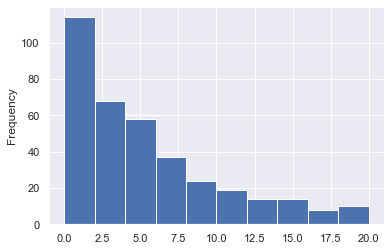

In [7]:
# Посмотрим распределение `absences` без выбросов
filtered(stud.absences)
filtered(stud.absences).plot(kind='hist')

> В выборке всего 394 записи. Возраст везде заполнен

> Выборка возможно когда-то была отсортирована по возрасту учеников, и дополнена случайным образом.

> Математически возраст 22 можно считать выбросом, но вполне реален в рамках допустимых значений. 

> Выбросы по `absences` есть, отфильтруем эти строки

In [8]:
stud = stud.loc[filtered_mask(stud.absences)]
#stud.absences.plot(kind='hist') - уже будет выглядеть как гистограмма выше

In [9]:
display(stud['studytime, granular'].unique())

array([ -6.,  -9.,  -3.,  nan, -12.])

> Недокументированные показатель. Попробуем заделить на -3

<AxesSubplot:>

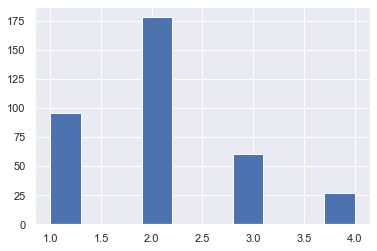

In [10]:
stud['studytime, granular'].apply(lambda x: x/-3).hist()

> Распределение похоже на нормальное. Похоже на бальную оценку как и у других показателей.

### Показатели с оценками

,traveltime,studytime,famrel,freetime,goout,health
-1.0,NaN,NaN,1,NaN,NaN,NaN
1.0,242.0,103.0,7,18.0,23.0,47.0
2.0,96.0,194.0,17,63.0,101.0,43.0
3.0,22.0,64.0,62,153.0,127.0,89.0
4.0,7.0,27.0,182,112.0,84.0,63.0
5.0,NaN,NaN,99,38.0,52.0,138.0


array([[<AxesSubplot:title={'center':'traveltime'}>,
        <AxesSubplot:title={'center':'studytime'}>,
        <AxesSubplot:title={'center':'famrel'}>],
       [<AxesSubplot:title={'center':'freetime'}>,
        <AxesSubplot:title={'center':'goout'}>,
        <AxesSubplot:title={'center':'health'}>]], dtype=object)

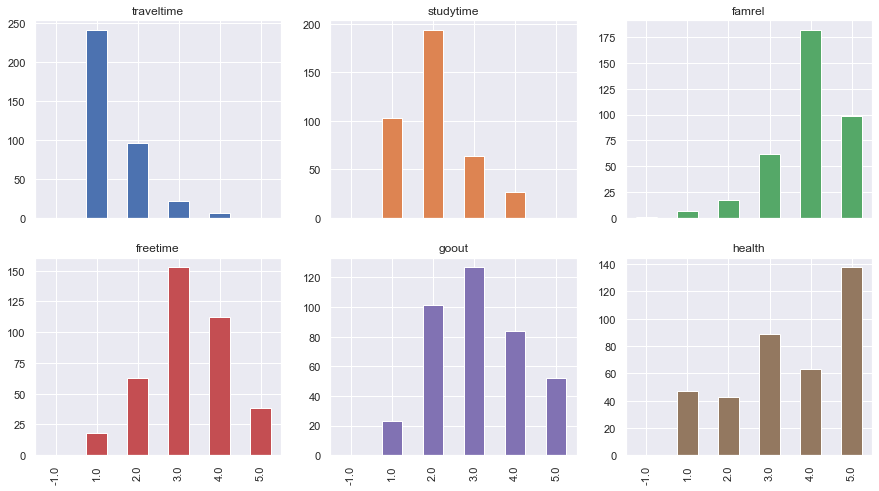

In [11]:
display(marks_df)
marks_df[marks].plot(kind='bar', subplots=True, layout=(2,3),legend=False, figsize=(15,8))

> выброс только у `famrel`

> все показатели имеют несиметричное распределение и смещение тоже разное

> `traveltime` - время до школы максимально смещено вправо, может говорить о том, что ученики чаще выбирают ближайшую школу к дому

> `health` - ближе к бимодальному р-ю 

In [12]:
# очистим выброс, но не удаляем полностью строку
stud.famrel = stud.famrel.apply(lambda x: None if x<1 else x)

### Образование Родителей

<BarContainer object of 6 artists>

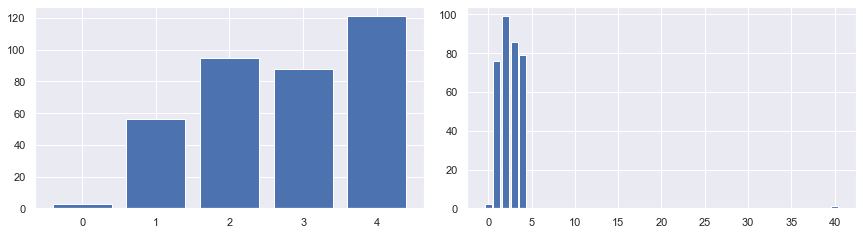

In [13]:
fig = plt.figure()
Medu = fig.add_axes([0, 0, 0.9, 0.7])
Medu.bar(x=stud.Medu.value_counts().index, height=stud.Medu.value_counts())
Fedu = fig.add_axes([1,0,0.9,0.7])
Fedu.bar(x=stud.Fedu.value_counts().index, height=stud.Fedu.value_counts())

> У показателя Fedu есть выброс(ы), не попадающие в шкалу оценок 0..4

> Родителей без образования очень мало

> Среди всех отцов наибольшее количество с в/о, среди матерей наиболее часто встречаются с 5-9 классами.

In [14]:
# также очистим выбросы в `Fedu` но строки не дропаем
stud.Fedu = stud.Fedu.apply(lambda x: None if x>4 else x)

,Medu,Fedu
Medu,1.000000,0.634066
Fedu,0.634066,1.000000


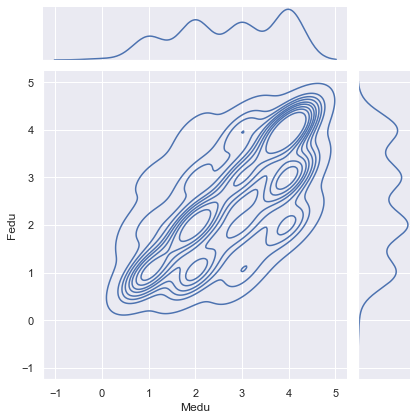

In [15]:
display(stud[['Medu','Fedu']].corr())
# ['scatter', 'hist', 'hex', 'kde', 'reg', 'resid']
sns.jointplot(x='Medu', y='Fedu', data=stud, kind='kde')

> Притом образование родителей чётко коррелирует

### Целевой показатель

In [16]:
# Посмотрим на значений целевого показателя
stud.score.unique()

array([ 30.,  50.,  75.,  55.,  95.,  45.,  60.,  70.,  80.,  25.,  40.,
        85.,  90.,  65., 100.,  35.,   0.,  nan])

In [17]:
# уберём строки без значения целевого показателя
stud.dropna(subset=['score'], inplace=True)

<AxesSubplot:ylabel='Frequency'>

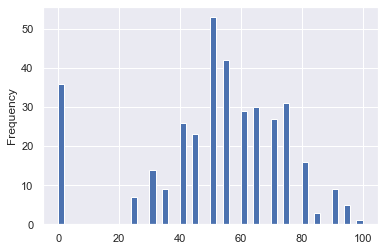

In [18]:
stud.score.plot(kind='hist', bins=50)

> Значение 0 выбивается из распределения. Делаем вывод что это тоже отсутствие результата

In [19]:
stud = stud[stud.score.apply(lambda x: x>0)]

## III Номинативные переменные (оценить количество уникальных значений)

In [20]:
# Выберем все колонки типа object
object_columns = stud.columns[ stud.dtypes == 'object' ]

# И посчитаем количество уникальных по каждой
stud[object_columns].nunique()

school        2
sex           2
address       2
famsize       2
Pstatus       2
Mjob          5
Fjob          5
reason        4
guardian      3
schoolsup     2
famsup        2
paid          2
activities    2
nursery       2
higher        2
internet      2
romantic      2
dtype: int64

> По уникальности значений все показатели в рамках их описания. Это говорит о том что в выборке (по этим показателям) нет ошибок с неверными значениями

> `school` могло бы быть больше. Мы имеем выборку только из вдух школ.

## IV Преобразования

In [21]:
# Показатель `studytime, granular` который изучили выше приведём к шкале оценок
stud['studytime, granular'] = stud['studytime, granular'].apply(lambda x: x/-3)

# И добавим его к marks для дальшейших графиков
marks += ['studytime, granular']
marks

['traveltime',
 'studytime',
 'famrel',
 'freetime',
 'goout',
 'health',
 'studytime, granular']

> Остальные показатели не требуют преобразований

## V Корреляционный анализ

### Возраст

,age,score
age,1.000000,-0.131938
score,-0.131938,1.000000


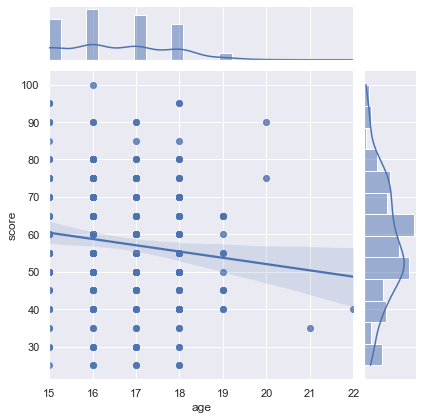

In [22]:
display(stud[['age','score']].corr())
sns.jointplot(x='age', y='score', data=stud, kind='reg')

> Корреляция отрицательная. Молодые ученики в среднем лучше сдают гос экзамен.

### Численные показатели (бальные)

In [23]:
cor_numeric = pd.concat([stud[marks],stud.score],axis=1).corr()

In [24]:
cor_numeric.score.sort_values()

goout                 -0.188648
traveltime            -0.077030
health                -0.064667
freetime               0.002375
famrel                 0.057404
studytime              0.147275
studytime, granular    0.147275
score                  1.000000
Name: score, dtype: float64

<AxesSubplot:>

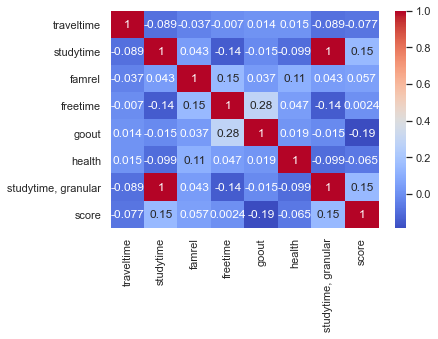

In [25]:
sns.heatmap(cor_numeric, annot=True, cmap='coolwarm')

> видим полную кореляцию между `studytime`  и `studytime, granular`. Отфильтруем её сразу

> максимальная корреляция `score` у `studytime` = 0.11

> однако некоторые показатели как `goout` и `freetime` между собой также имеют корреляцию (0.29)

In [26]:
# уберём дублирующий столбец
stud.drop('studytime, granular', axis=1, inplace=True)

<AxesSubplot:xlabel='Fedu', ylabel='score'>

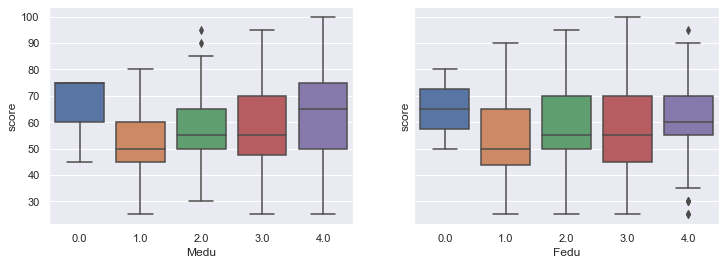

In [27]:
# зависимость от образования родителей посмотрим на boxplot
fig, subplots = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize = (12, 4))

sns.boxplot(x='Medu', y='score', data=stud, ax=subplots[0])
sns.boxplot(x='Fedu', y='score', data=stud, ax=subplots[1])

> Уровень образования родителей 0 в среднем показывает лучший результат. Возможно нулями заполнены отсутствующие данные об образовании родителей

### Номинативные показатели

In [28]:
# мы уже выбирали их ранее
object_columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

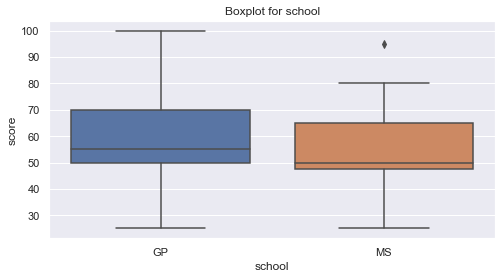

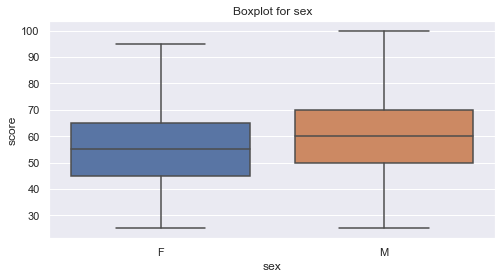

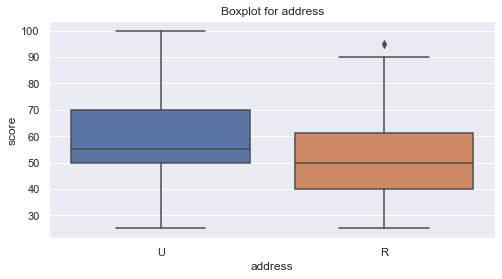

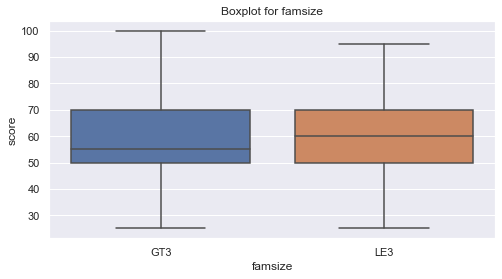

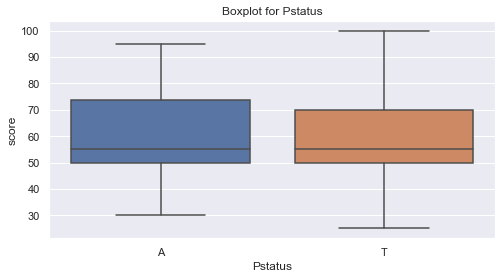

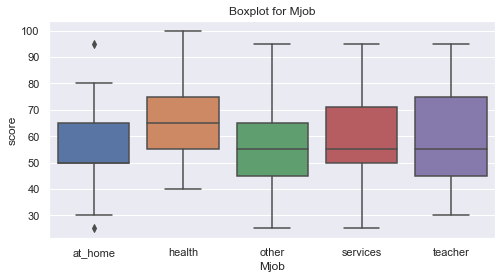

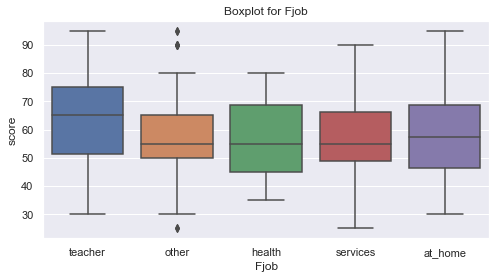

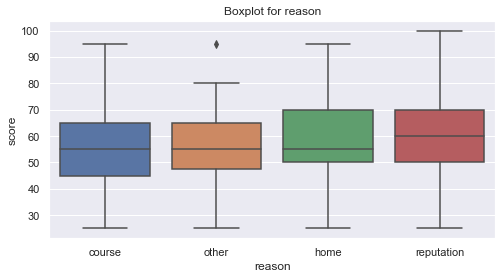

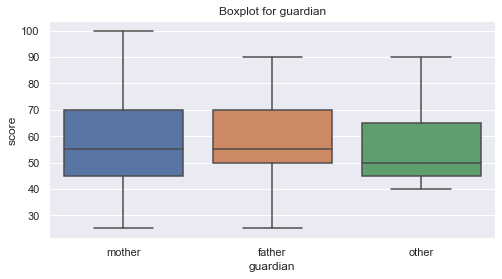

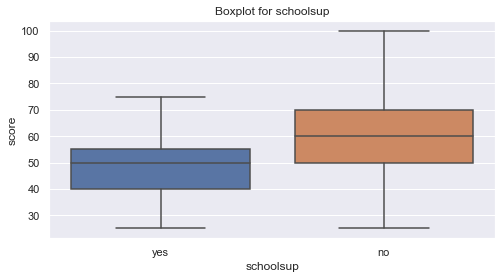

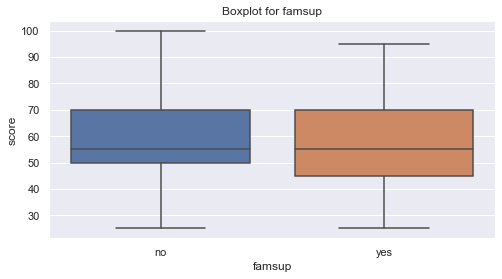

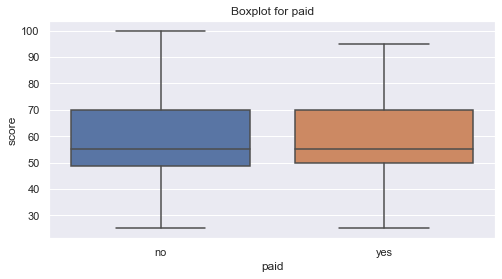

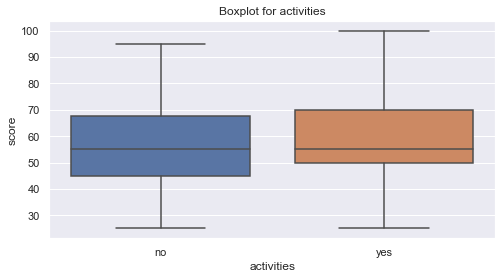

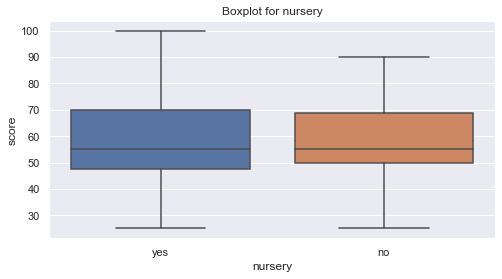

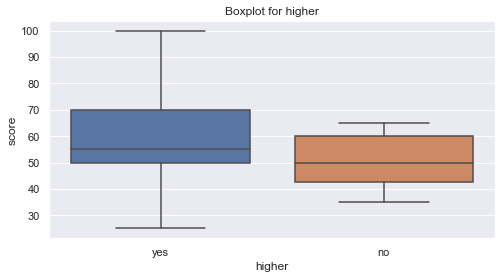

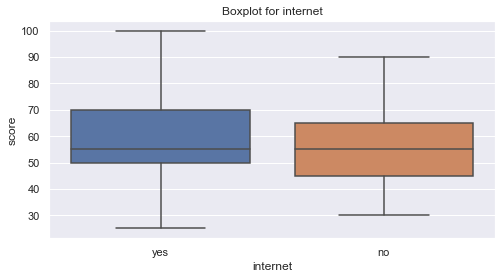

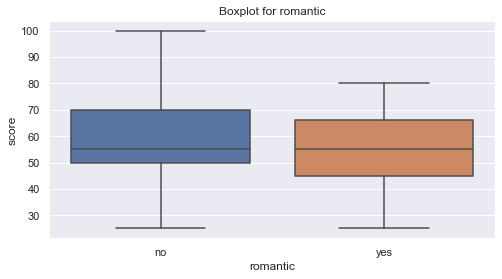

In [29]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (8, 4))
    sns.boxplot(x=column, y='score', data=stud, ax=ax)
    ax.set_title('Boxplot for ' + column)
    plt.show()
    
for col in object_columns:
    get_boxplot(col)

> Судя по графикам отличающие показатели: `school`, `sex`, `address`, `Mjob`, `Fjob`, `reason`, `guardian`, `schoolsup`, `activities`, `higher`, `internet`, `romantic`

> Показатели с незначительными различиями в оценках: `famsize`,  `Pstatus`, `famsup`, `paid`, `nursery`

## VI-VII не коррелирующие переменные

In [30]:
# Из числовых `freetime` корреляция < 0.05
stud.drop(['freetime'], axis=1, inplace=True)

# Наминативные показатели с незначительными отличиями
stud.drop(['famsize', 'Pstatus', 'famsup', 'paid', 'nursery'], axis=1, inplace=True)

## VIII Выводы
> В выборке имелось незначительное количество ошибок или выбросов

> Нет какого-то одного показателя который бы сильно коррелировал с целевым

> В колонках оставлены роказатели, которые возможно оказывают влияние на итоговую оценку по гос.экзамену

In [31]:
list(stud.columns)

['school',
 'sex',
 'age',
 'address',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'activities',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'goout',
 'health',
 'absences',
 'score']